# ***` Logistic Regression `***

***` Import the Iris data and to build a logistic regression model to distinguish between two  of the species using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`


`2)Import the Iris Data, and visualize the data to an idea about it.`

`3)Split the data in X,y and convert them into arrays`

`4)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`5)Find the weights and bias and save it in a list`

`6)Make a prediction on the test data.Find the accuracy of the prediction.`

`7)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.`


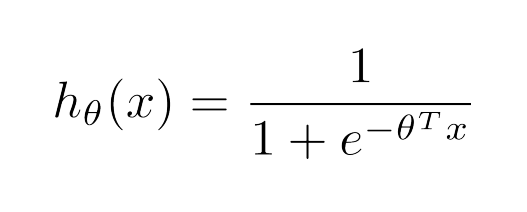

In [21]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import math


f(x)= 1/ 1+e^-x

# ***`Importing and Visualizing Data`***



In [22]:
#Sigmoid Function
def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

[4.5397868702434395e-05, 0.00012339457598623172, 0.0003353501304664781, 0.0009110511944006454, 0.0024726231566347743, 0.0066928509242848554, 0.01798620996209156, 0.04742587317756678, 0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823, 0.9525741268224334, 0.9820137900379085, 0.9933071490757153, 0.9975273768433653, 0.9990889488055994, 0.9996646498695336, 0.9998766054240137, 0.9999546021312976]


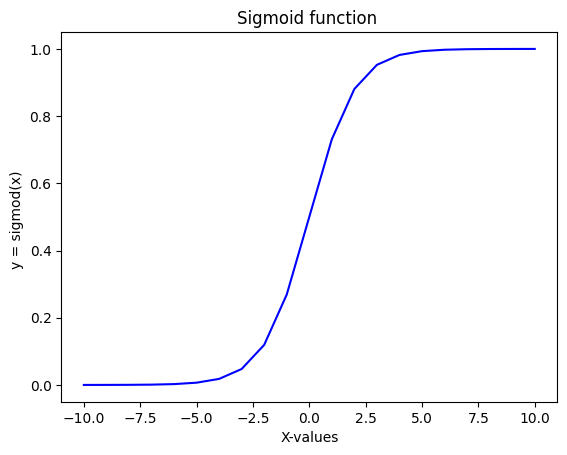

In [23]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10


#x_val = np.array([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
x_val = np.arange(-10,11,1)

#Find y_val, by using sigmoid function
y_val = []


for x in x_val:
    sig = sigmoid(x)
    y_val.append(sig)
#Plot x_val,y_val and label the graph
print(y_val)

plt.title("Sigmoid function ")
plt.xlabel("X-values")
plt.ylabel("y = sigmod(x) ")
plt.plot(x_val,y_val,color = "blue")
plt.show()

In [ ]:
y_val

[4.5397868702434395e-05,
 0.00012339457598623172,
 0.0003353501304664781,
 0.0009110511944006454,
 0.0024726231566347743,
 0.0066928509242848554,
 0.01798620996209156,
 0.04742587317756678,
 0.11920292202211755,
 0.2689414213699951,
 0.5,
 0.7310585786300049,
 0.8807970779778823,
 0.9525741268224334,
 0.9820137900379085,
 0.9933071490757153,
 0.9975273768433653,
 0.9990889488055994,
 0.9996646498695336,
 0.9998766054240137,
 0.9999546021312976]




# ***`Processing the Data`***

In [8]:
#Import the dataset of iris
from sklearn.datasets import load_iris

data = load_iris()
data


df = pd.DataFrame(data.data, columns=data.feature_names)

df['Species']=data.target
#y=data.target
# #data.data  data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df.drop('Species',inplace=True)


In [11]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2

# Considering Iris-setosa as "0" and Iris-versicolor as "1"

indexNames = df[ df['Species'] == 2 ].index

print(indexNames)
# Delete these row indexes from dataFrame

df.drop(indexNames , inplace=True)

print(df)

Int64Index([], dtype='int64')
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    Speci

# ***`Obtaining Weight Values`***

In [15]:
# Split the data into X and y
X = df.iloc[:, [0,1,2, 3]].values

y = df.iloc[:, 4].values

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Visualize X,y and
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

X_test.shape


(10, 4)

In [ ]:
X.shape

(100, 4)

In [17]:
#Importing Necessary Libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression


#Building our model


sv=LogisticRegression()


sv.fit(X_train,y_train)


sv.predict(X_test)

#Finding the parameter and bias
print(sv.intercept_)#bias # theta0

print(sv.coef_)#parameters



[-6.81237465]
[[ 0.47207886 -0.8455532   2.26159247  0.94924737]]


In [ ]:
#Printing the parameters and bias
print(sv.intercept_)#bias
print(sv.coef_)#parameters

[-6.52460563]
[[ 0.42381618 -0.85969617  2.25677609  0.9381469 ]]


In [18]:
#Predicitng on our test data
pred = sv.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [19]:
#Finding the accuracy
ans=sv.score(X_test,y_test)

ans

1.0

In [20]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans "Setosa" or "Versicolor"
idx=sv.predict([[4.9,4,10.2,0.4]])

idx


array([1])

**Logistic Regression :**

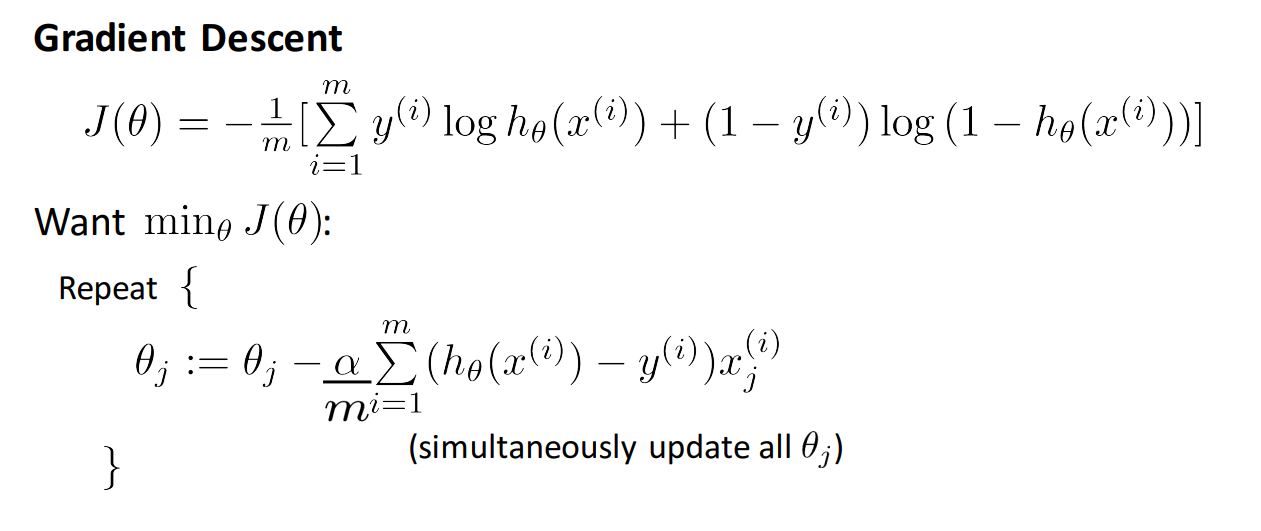